### Libraries

In [36]:
import pandas as pd
import numpy as np
import re
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import sys
import os

# Specify the directory containing your module
module_dir = '/Users/gabrielvictorgomesferreira/artificial_intelligence/isu_classes/modules'

# Add the directory to sys.path if not already present
if module_dir not in sys.path:
    sys.path.append(module_dir)
    
from help_functions import *

### Config

In [37]:
data_loc = "/Users/gabrielvictorgomesferreira/Library/Mobile Documents/com~apple~CloudDocs/Work/ISU Classes/Data/"
file_name = "spotify_songs.csv"

### Import Dataset

In [38]:
songs_df = pd.read_csv(data_loc + file_name)
rows, columns = songs_df.shape
print(f"The dataset contains {rows:,} rows and {columns} columns")
songs_df.head()

The dataset contains 32,833 rows and 23 columns


,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


### Data Exploration

#### Check Data Types

In [39]:
songs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

#### Check for Null Values

In [40]:
songs_df.isna().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

### Check for duplicated data

In [41]:
songs_df.duplicated().sum()

0

#### Numeric Feature Exploration

In [42]:
numeric_columns = songs_df.select_dtypes(include=['number']).columns
print(numeric_columns)
print(f"There is {len(numeric_columns)} numerical features.")

Index(['track_popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms'],
      dtype='object')
There is 13 numerical features.


#### Outlier Analysis

For the outlier analysis, I started by visualizing the quartile distributions for each numeric column to understand the potential outliers. The boxplots, shown below, provide an overview of how each feature is distributed, including the range, interquartile range (IQR), and outliers that lie outside the whiskers of the boxplot.

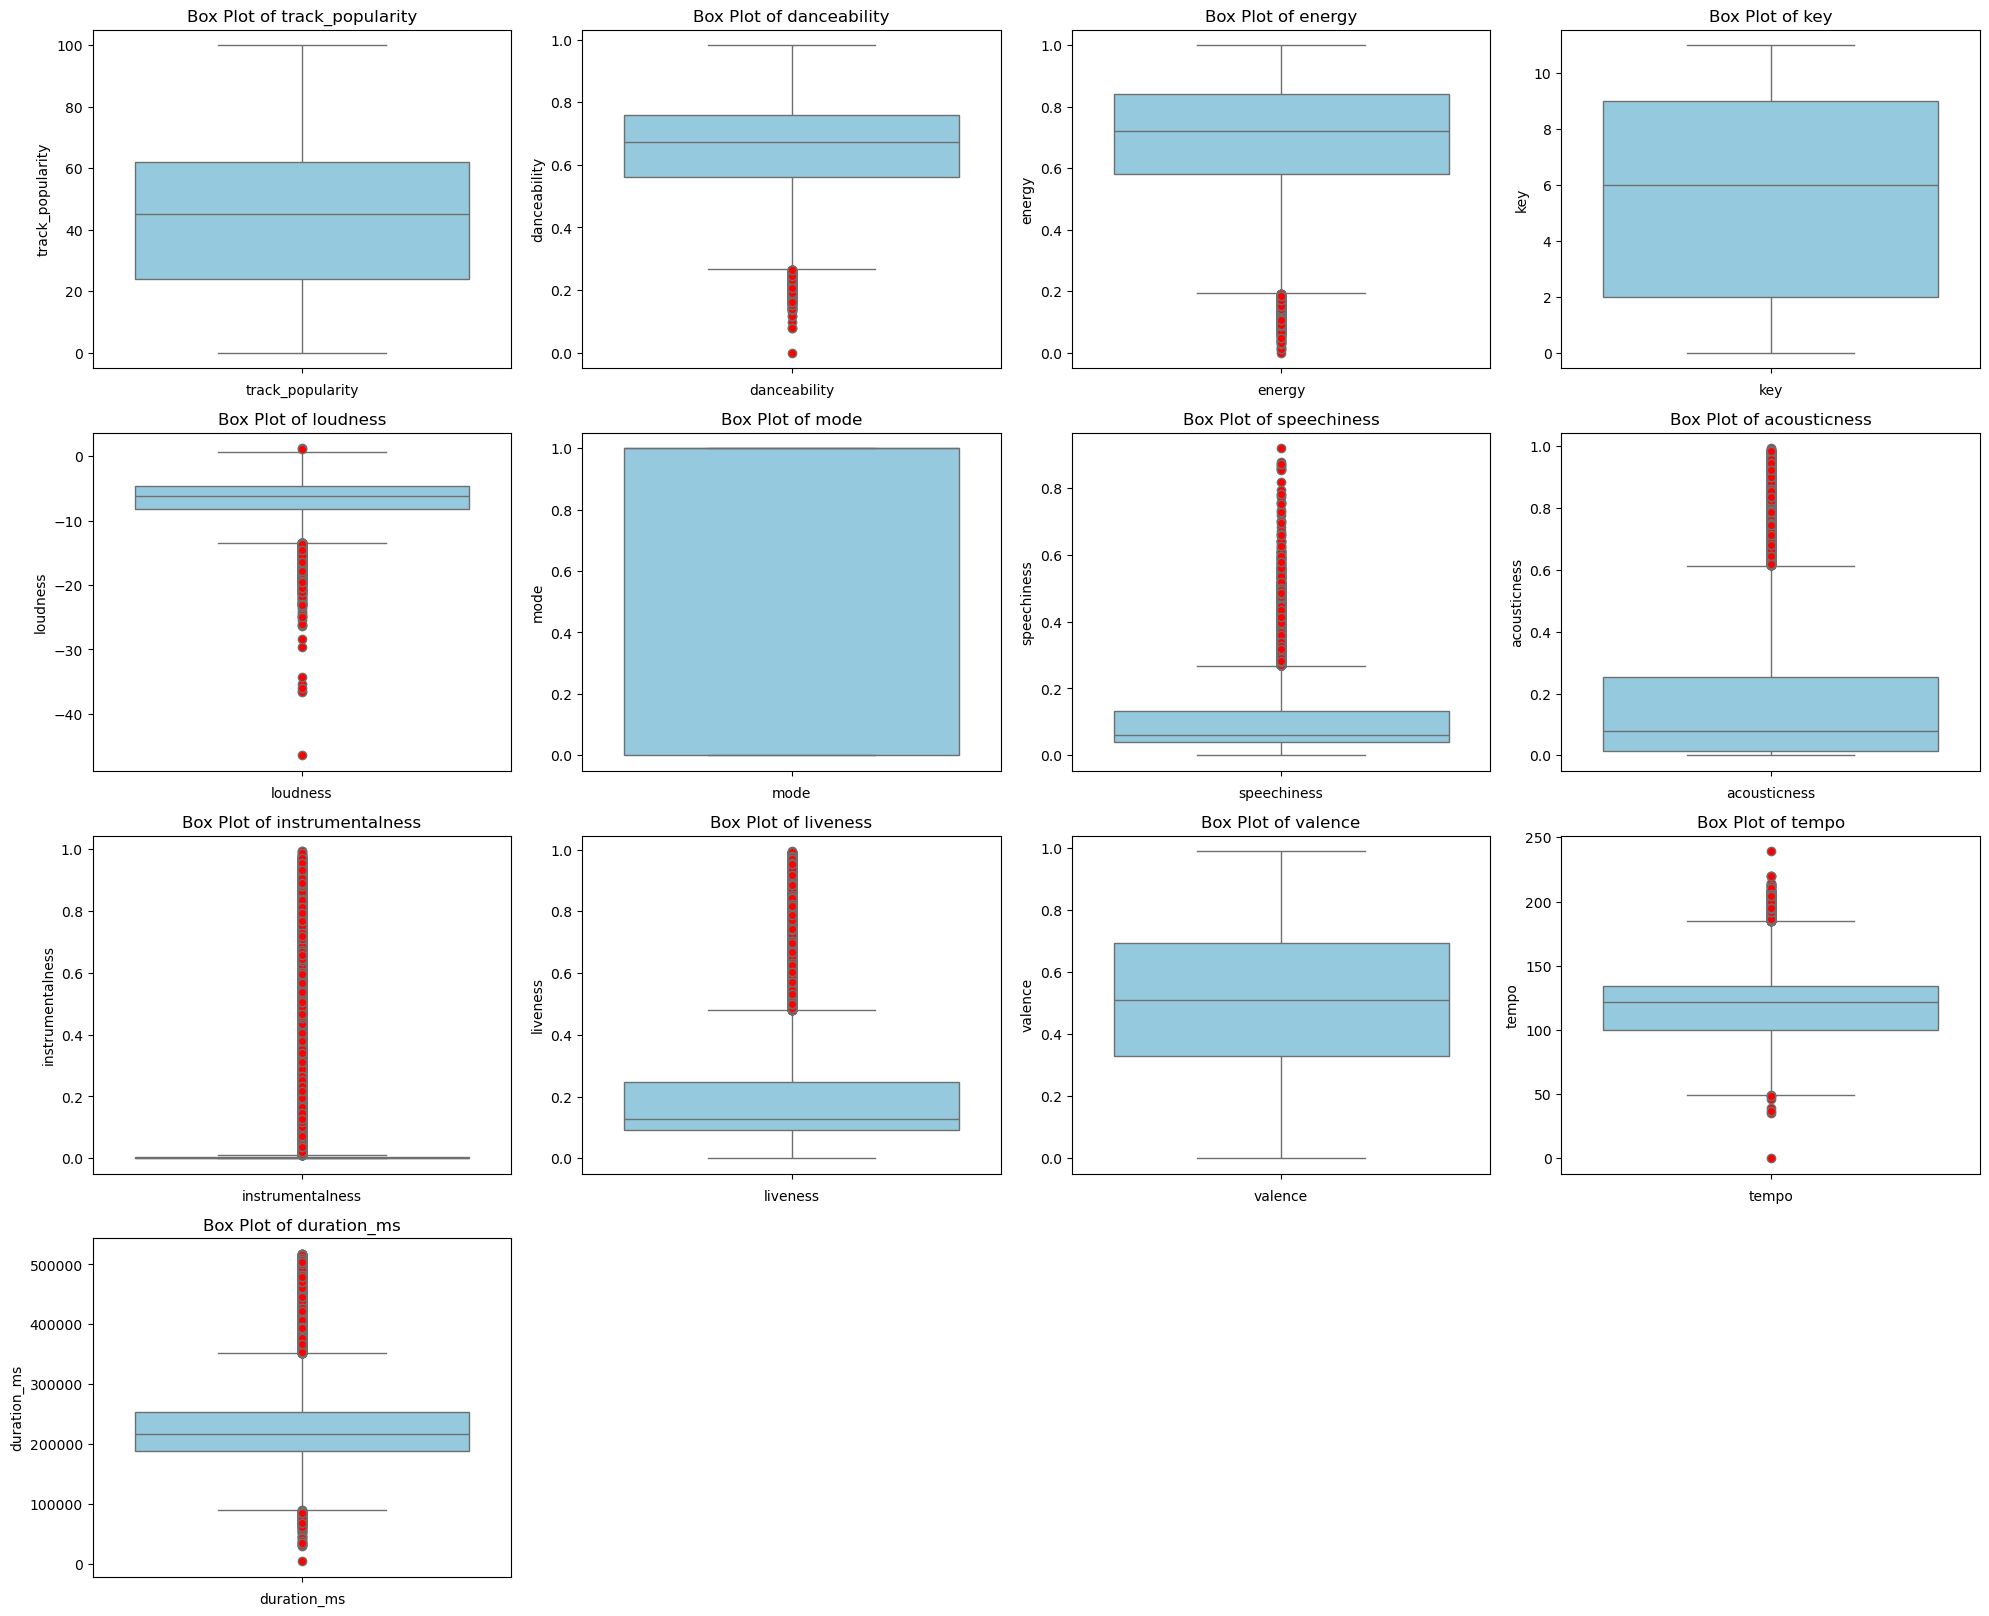

In [24]:
## Box-plot visualizations
plt.figure(figsize=(20, 20))
for i, feature in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    sns.boxplot(data=songs_df[feature], color='skyblue', flierprops={'markerfacecolor': 'red', 'marker': 'o'})
    plt.title(f'Box Plot of {feature}')
    plt.xlabel(feature)
plt.tight_layout()
plt.show()

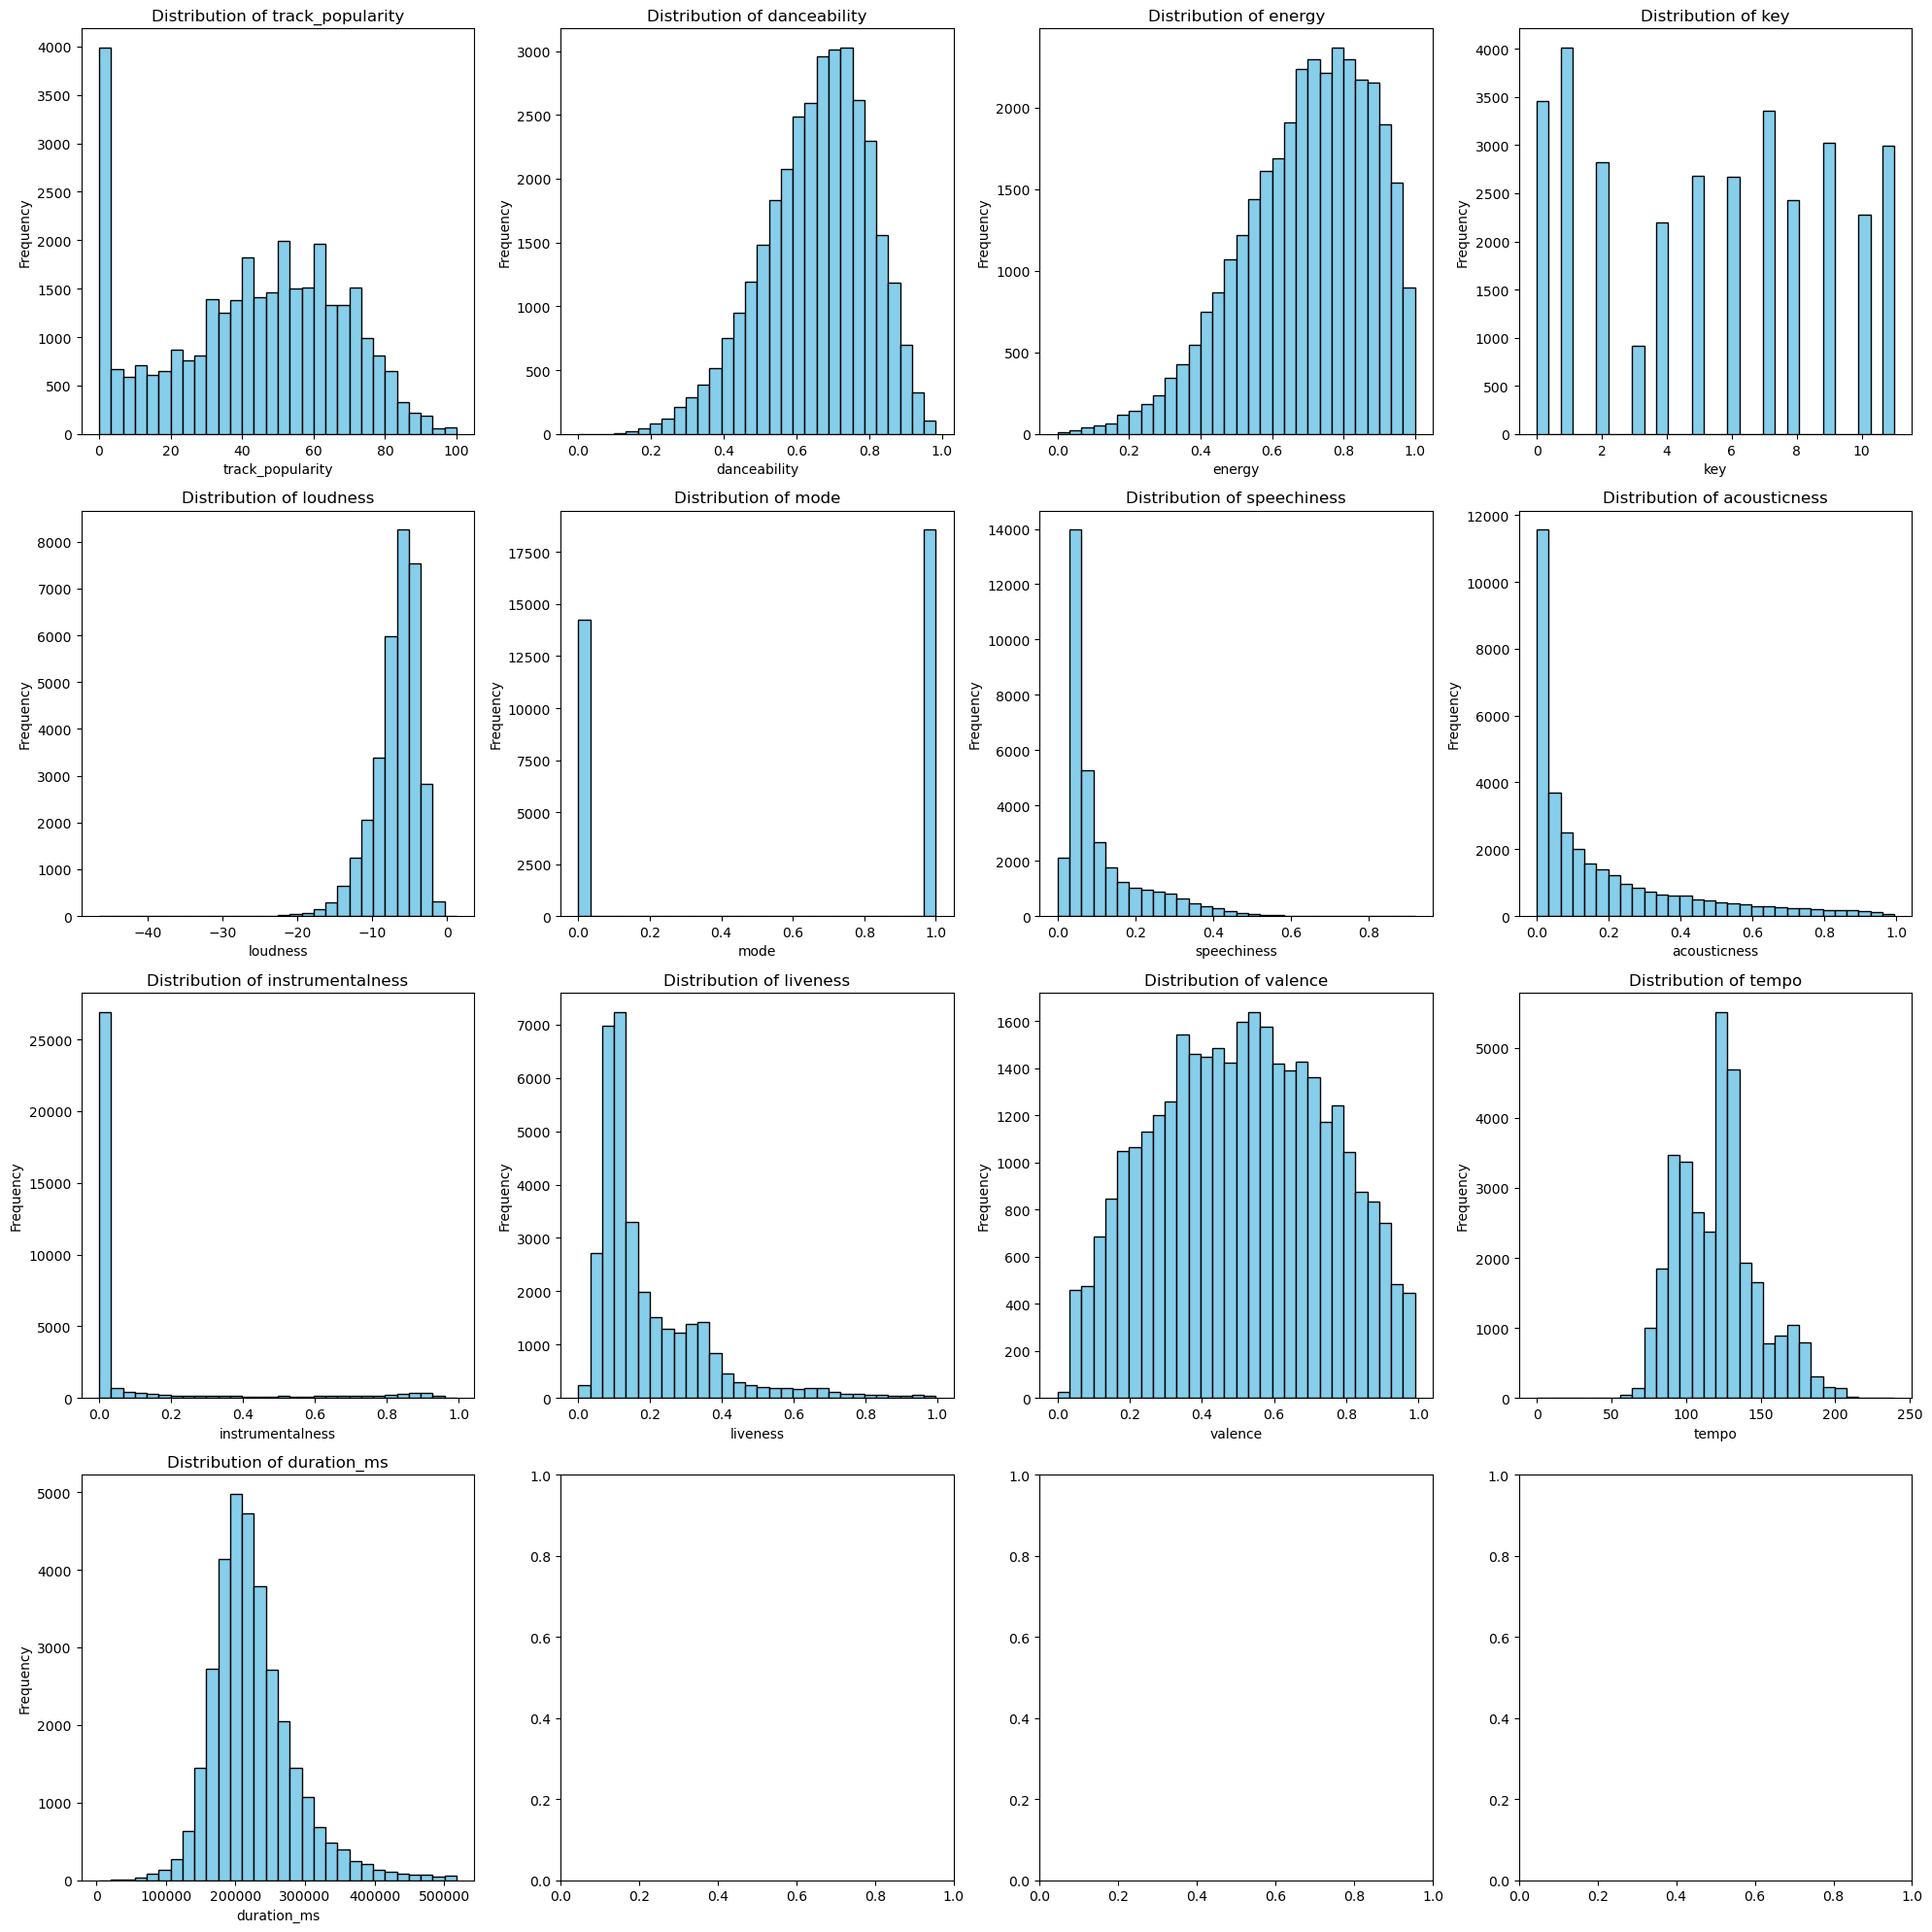

In [25]:
# Plot histograms for each numeric column in a grid layout
num_plots = len(numeric_columns)
cols = 4  # Number of columns in the grid
rows = (num_plots // cols) + (num_plots % cols > 0)  # Determine number of rows

fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 5))
axes = axes.flatten()  # Flatten axes for easy indexing

for i, col in enumerate(numeric_columns):
    ax = axes[i]
    ax.hist(songs_df[col], bins=30, color='skyblue', edgecolor='black')
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### Categorical Features Exploration

In [26]:
cat_columns = songs_df.select_dtypes(include=['object', 'category']).columns
print(cat_columns)
print(f"There is {len(cat_columns)} categorical features.")
songs_df[cat_columns].head()

Index(['track_id', 'track_name', 'track_artist', 'track_album_id',
       'track_album_name', 'track_album_release_date', 'playlist_name',
       'playlist_id', 'playlist_genre', 'playlist_subgenre'],
      dtype='object')
There is 10 categorical features.


,track_id,track_name,track_artist,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop


In [27]:
# Loop through each categorical column and print value counts
for col in cat_columns:
    print(f"Column '{col}' has {songs_df[col].nunique()} unique values.")
    print(f"Value counts for column '{col}':")
    print(songs_df[col].value_counts())
    print("\n" + "-"*50 + "\n")


Column 'track_id' has 28356 unique values.
Value counts for column 'track_id':
track_id
7BKLCZ1jbUBVqRi2FVlTVw    10
14sOS5L36385FJ3OL8hew4     9
3eekarcy7kvN4yt5ZFzltW     9
2Fxmhks0bxGSBdJ92vM42m     8
2tnVG71enUj33Ic2nFN6kZ     8
                          ..
3AKwyujeGxTQSZNbx9Ka3c     1
3ITvHA9zhZZdBJsOsAUegF     1
5gsW8TMmNVnevjq13h0Nlp     1
4pN4icvWINm9uN3bElfbec     1
29zWqhca3zt5NsckZqDf6c     1
Name: count, Length: 28356, dtype: int64

--------------------------------------------------

Column 'track_name' has 23449 unique values.
Value counts for column 'track_name':
track_name
Poison                    22
Breathe                   21
Alive                     20
Forever                   20
Stay                      19
                          ..
Quien Eres Tu              1
Como Nadie                 1
Ya No Estás Aquí           1
Ojala                      1
Typhoon - Original Mix     1
Name: count, Length: 23449, dtype: int64

--------------------------------------------

#### track_album_release_date

In [28]:
songs_df['track_album_release_date'] = standardize_date(songs_df['track_album_release_date'])
songs_df['year'] = songs_df['track_album_release_date'].dt.year
songs_df['month'] = songs_df['track_album_release_date'].dt.month
songs_df['day'] = songs_df['track_album_release_date'].dt.day
songs_df = songs_df.drop(columns=['track_album_release_date'])

In [30]:
songs_df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year,month,day
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754,2019,6,14
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600,2019,12,13
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616,2019,7,5
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093,2019,7,19
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052,2019,3,5


In [29]:
songs_df.year.describe()

count    32833.000000
mean      2011.137270
std         11.417451
min       1957.000000
25%       2008.000000
50%       2016.000000
75%       2019.000000
max       2020.000000
Name: year, dtype: float64

#### playlist_genre

In [37]:
songs_df['playlist_genre'].value_counts()

playlist_genre
edm      6043
rap      5746
pop      5507
r&b      5431
latin    5155
rock     4951
Name: count, dtype: int64

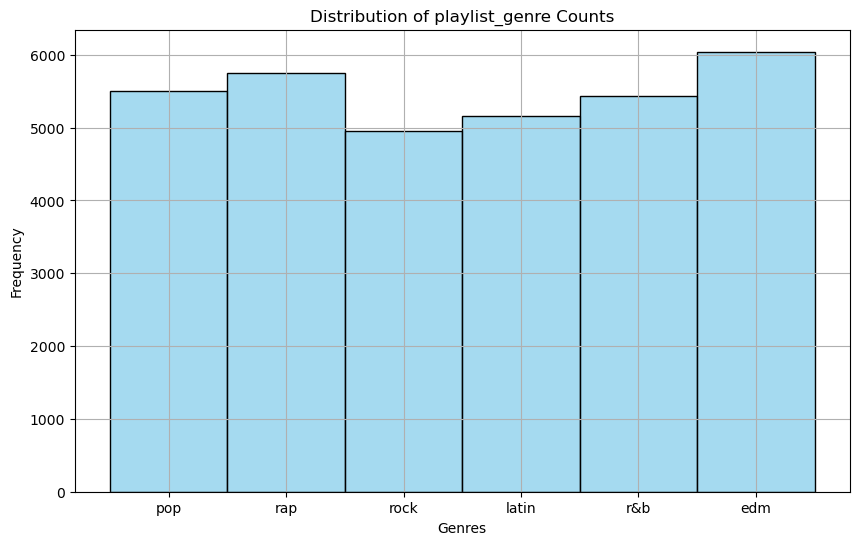

In [38]:
# Visualize the distribution of playlist_genre counts
plt.figure(figsize=(10, 6))
sns.histplot(songs_df['playlist_genre'],color='skyblue')
plt.title('Distribution of playlist_genre Counts')
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Genre feature is well-balanced. Let's hot encode it.

In [31]:
from sklearn.preprocessing import LabelEncoder

# Dictionary to store LabelEncoders for each categorical feature
label_encoders = {}

# Create a LabelEncoder
label_encoders['playlist_genre'] = LabelEncoder()
songs_df['genre_label'] = label_encoders['playlist_genre'].fit_transform(songs_df['playlist_genre'])
songs_df

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year,month,day,genre_label
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754,2019,6,14,2
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600,2019,12,13,2
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616,2019,7,5,2
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.718,0.930,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093,2019,7,19,2
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.650,0.833,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052,2019,3,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.428,0.922,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375,2014,4,28,0
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.522,0.786,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120,2013,3,8,0
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.529,0.821,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112,2014,4,21,0
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.626,0.888,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432,2014,1,1,0


In [33]:
songs_df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year,month,day,genre_label
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754,2019,6,14,2
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600,2019,12,13,2
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616,2019,7,5,2
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093,2019,7,19,2
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052,2019,3,5,2


In [34]:
pre_model_df = songs_df[numeric_columns]
pre_model_df.head()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,66,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,67,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,70,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,60,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,69,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [35]:
songs_df.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'playlist_name', 'playlist_id',
       'playlist_genre', 'playlist_subgenre', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'year', 'month', 'day',
       'genre_label'],
      dtype='object')